# HR Employee Attrition Analysis

In [146]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns

In [196]:
import warnings
warnings.filterwarnings('ignore')

In [148]:
hr = pd.read_csv('HR_Employee_Attrition.csv')

### Exploratory Data Analysis

In [149]:
hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [150]:
hr.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [151]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [152]:
hr['Attrition'].value_counts(normalize=True)

No    0.84
Yes   0.16
Name: Attrition, dtype: float64

##### Attrition Visualization

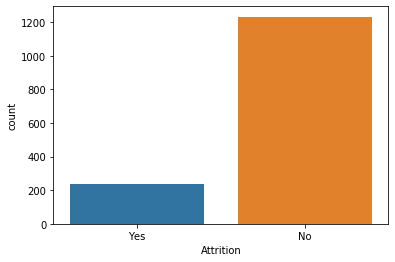

In [153]:
sns.countplot(hr['Attrition'])

##### Attrition relationship with Monthly Incone 

(array([0, 1]), <a list of 2 Text xticklabel objects>)

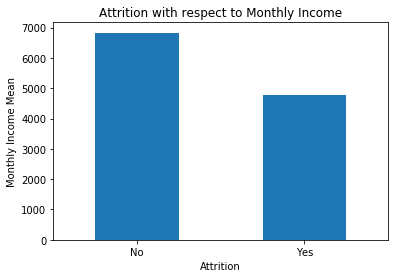

In [154]:
hr.groupby('Attrition')['MonthlyIncome'].mean().plot(kind='bar')
plt.title('Attrition with respect to Monthly Income')
plt.xlabel('Attrition')
plt.ylabel('Monthly Income Mean')
plt.xticks(rotation=0)

##### Attrition relationship with Distance from Home

(array([0, 1]), <a list of 2 Text xticklabel objects>)

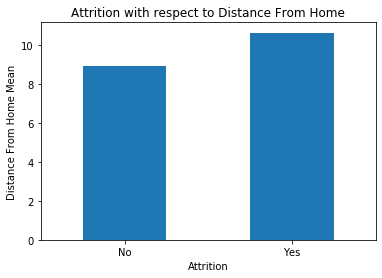

In [155]:
hr.groupby('Attrition')['DistanceFromHome'].mean().plot(kind='bar')
plt.title('Attrition with respect to Distance From Home')
plt.xlabel('Attrition')
plt.ylabel('Distance From Home Mean')
plt.xticks(rotation=0)

##### Attrition relationship with Department

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

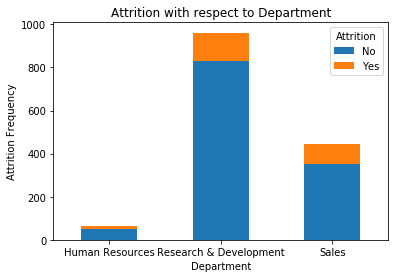

In [156]:
pd.crosstab(hr['Department'],hr['Attrition']).plot(kind='bar', stacked=True)
plt.title('Attrition with respect to Department')
plt.xlabel('Department')
plt.ylabel('Attrition Frequency')
plt.xticks(rotation=0)

### Feature Engineering

In [157]:
# EmployeeCount, EmployeeNumber, Over18 and StandardHours columns are deleted
# EmployeeNumber is unique to each employee hereas the other colums have only one values so it cannot be helpful
# in our prediction for attritiom
hr.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'],axis=1,inplace=True)

In [158]:
hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [159]:
hr['Attrition'] = hr['Attrition'].map({'Yes':1, 'No':0}).astype(int)

In [160]:
hr['Attrition'].value_counts(normalize=True)

0   0.84
1   0.16
Name: Attrition, dtype: float64

In [161]:
# Converting to categorical variables
hr['Attrition'] = hr['Attrition'].astype('category')

### Checking Correlation between variables

In [162]:
#Checking correlation between variables
hr.corr()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.00,0.01,-0.00,0.21,0.01,0.02,0.03,0.51,-0.00,0.50,...,0.00,0.05,0.04,0.68,-0.02,-0.02,0.31,0.21,0.22,0.20
DailyRate,0.01,1.00,-0.00,-0.02,0.02,0.02,0.05,0.00,0.03,0.01,...,0.00,0.01,0.04,0.01,0.00,-0.04,-0.03,0.01,-0.03,-0.03
DistanceFromHome,-0.00,-0.00,1.00,0.02,-0.02,0.03,0.01,0.01,-0.00,-0.02,...,0.03,0.01,0.04,0.00,-0.04,-0.03,0.01,0.02,0.01,0.01
Education,0.21,-0.02,0.02,1.00,-0.03,0.02,0.04,0.10,-0.01,0.09,...,-0.02,-0.01,0.02,0.15,-0.03,0.01,0.07,0.06,0.05,0.07
EnvironmentSatisfaction,0.01,0.02,-0.02,-0.03,1.00,-0.05,-0.01,0.00,-0.01,-0.01,...,-0.03,0.01,0.00,-0.00,-0.02,0.03,0.00,0.02,0.02,-0.00
HourlyRate,0.02,0.02,0.03,0.02,-0.05,1.00,0.04,-0.03,-0.07,-0.02,...,-0.00,0.00,0.05,-0.00,-0.01,-0.00,-0.02,-0.02,-0.03,-0.02
JobInvolvement,0.03,0.05,0.01,0.04,-0.01,0.04,1.00,-0.01,-0.02,-0.02,...,-0.03,0.03,0.02,-0.01,-0.02,-0.01,-0.02,0.01,-0.02,0.03
JobLevel,0.51,0.00,0.01,0.10,0.00,-0.03,-0.01,1.00,-0.00,0.95,...,-0.02,0.02,0.01,0.78,-0.02,0.04,0.53,0.39,0.35,0.38
JobSatisfaction,-0.00,0.03,-0.00,-0.01,-0.01,-0.07,-0.02,-0.00,1.00,-0.01,...,0.00,-0.01,0.01,-0.02,-0.01,-0.02,-0.00,-0.00,-0.02,-0.03
MonthlyIncome,0.50,0.01,-0.02,0.09,-0.01,-0.02,-0.02,0.95,-0.01,1.00,...,-0.02,0.03,0.01,0.77,-0.02,0.03,0.51,0.36,0.34,0.34


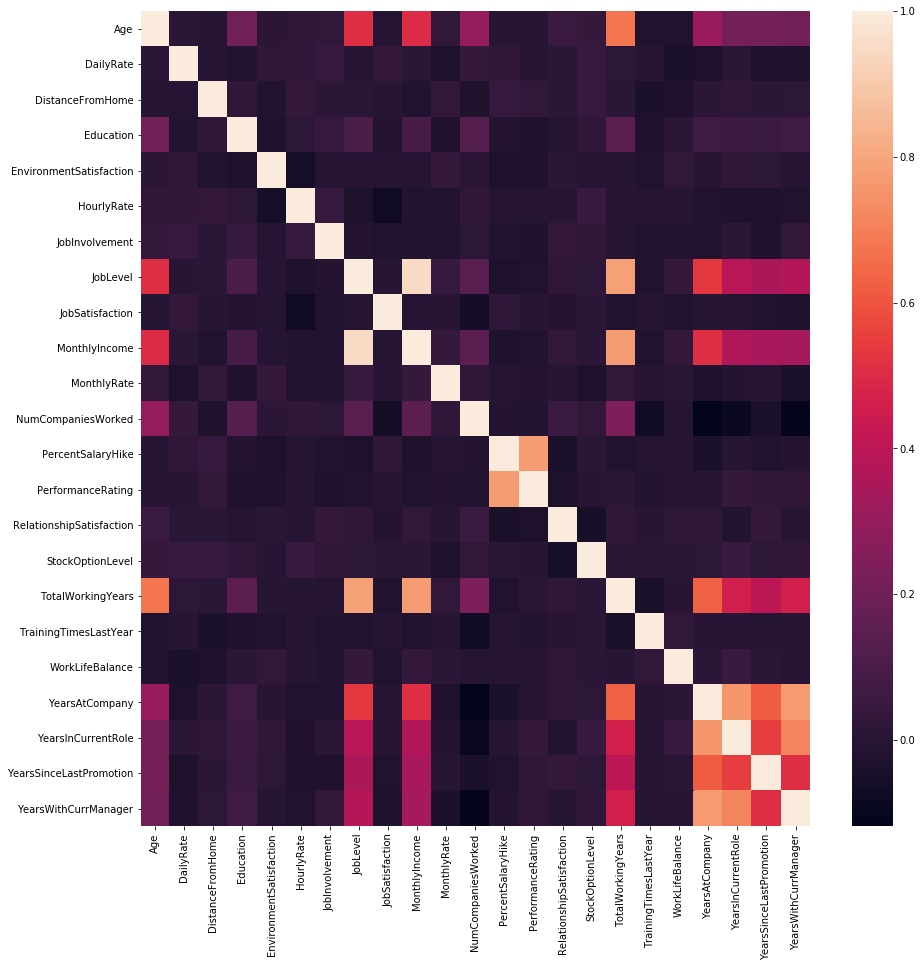

In [230]:
plt.figure(figsize=(15,15))
sns.heatmap(hr.corr(),annot=False)

##### It can be observed that the independent variables are not higly correlated to one another therefore there is no need for Principal Component Analysis (PCA)

In [164]:
#Split into X and Y
X = hr.drop(['Attrition'], axis=1)
y = hr[['Attrition']]

In [165]:
X = pd.get_dummies(X,drop_first=True)

### Using SMOTE because of unbalanced dataset

In [170]:
X1 = np.array(X)
y1 = np.array(y)

In [171]:
#X = np.array(hr.ix[:, hr.columns != 'Attrition'])
#y = np.array(hr.ix[:, hr.columns == 'Attrition'])
print('Shape of X: {}'.format(X1.shape))
print('Shape of y: {}'.format(y1.shape))

Shape of X: (1470, 44)
Shape of y: (1470, 1)


In [172]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.20, random_state = 420)
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

Before OverSampling, counts of label '1': [191]
Before OverSampling, counts of label '0': [985] 



In [173]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

After OverSampling, counts of label '1': 985
After OverSampling, counts of label '0': 985


### Scaling

In [174]:
#Feature scaling- convergence faster , no bias
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()  
X_train_res = sc.fit_transform(X_train_res)  
X_test = sc.transform(X_test)

In [175]:
print(X_train_res.shape)
print(X_test.shape)

(1970, 44)
(294, 44)


### Logistic Regression 

In [176]:
import statsmodels.api as sm
logit = sm.Logit(y, sm.add_constant(X))
lg = logit.fit(method='bfgs')

         Current function value: 0.297185
         Iterations: 35
         Function evaluations: 51
         Gradient evaluations: 41


In [177]:
#Summary of logistic regression
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1425
Method:                           MLE   Df Model:                           44
Date:                Tue, 14 Apr 2020   Pseudo R-squ.:                  0.3272
Time:                        02:44:50   Log-Likelihood:                -436.86
converged:                      False   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 8.937e-64
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 0.5690      2.302      0.247      0.805      -3.942       5.080
Age                                  -0.0286      0.013     -2

In [179]:
#Calculate Odds Ratio
lgcoef = pd.DataFrame(lg.params, columns=['coef'])
lgcoef.loc[:, "Odds_ratio"] = np.exp(lgcoef.coef)
lgcoef['probability'] = lgcoef['Odds_ratio']/(1+lgcoef['Odds_ratio'])
lgcoef['pval']=lg.pvalues
pd.options.display.float_format = '{:.2f}'.format

In [180]:
lgcoef = lgcoef.sort_values(by="Odds_ratio", ascending=False)
pval_filter = lgcoef['pval']<=0.1
lgcoef[pval_filter]

,coef,Odds_ratio,probability,pval
OverTime_Yes,1.95,7.06,0.88,0.00
BusinessTravel_Travel_Frequently,1.30,3.66,0.79,0.00
MaritalStatus_Single,1.03,2.81,0.74,0.00
JobRole_Laboratory Technician,0.94,2.57,0.72,0.03
PerformanceRating,0.91,2.49,0.71,0.02
BusinessTravel_Travel_Rarely,0.63,1.87,0.65,0.07
Gender_Male,0.52,1.68,0.63,0.00
NumCompaniesWorked,0.20,1.23,0.55,0.00
YearsSinceLastPromotion,0.15,1.17,0.54,0.00
YearsAtCompany,0.10,1.11,0.53,0.01


In [185]:
# Training the data using train data and then predicting on test data
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit_model = logit.fit(X_train_res, y_train_res)

In [189]:
# Make predictions for train and test set
ypred_logit_train = logit_model.predict(X_train_res)
ypred_logit_test = logit_model.predict(X_test)

In [190]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score,f1_score
confusion_matrix(y_test, ypred_logit_test)

array([[226,  22],
       [ 28,  18]], dtype=int64)

In [191]:
# For test data
print('Accuracy:  {} '.format(accuracy_score(y_test, ypred_logit_test)))
print('Recall:    {} '.format(recall_score(y_test, ypred_logit_test)))
print('Precision: {} '.format(precision_score(y_test, ypred_logit_test)))
print('F1 Score:  {} '.format(f1_score(y_test, ypred_logit_test)))

Accuracy:  0.8299319727891157 
Recall:    0.391304347826087 
Precision: 0.45 
F1 Score:  0.4186046511627907 


In [192]:
Classifier_Scores = {}
Classifier_Scores.update({'Logistic Regression':[accuracy_score(y_test, ypred_logit_test),recall_score(y_test, ypred_logit_test),precision_score(y_test, ypred_logit_test),f1_score(y_test, ypred_logit_test)]})

### Random Forest Classifier

In [81]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators= 50,random_state = 420,verbose= 0)
rf_model = rf.fit(X_train_res, y_train_res)

In [82]:
#Make predictions for train and test set
ypred_rf_train = rf_model.predict(X_train_res)
ypred_rf_test = rf_model.predict(X_test)

In [95]:
confusion_matrix(y_test, ypred_rf_test)

array([[236,  12],
       [ 31,  15]], dtype=int64)

In [98]:
# For test data
print('Accuracy:  {} '.format(accuracy_score(y_test, ypred_rf_test)))
print('Recall:    {} '.format(recall_score(y_test, ypred_rf_test)))
print('Precision: {} '.format(precision_score(y_test, ypred_rf_test)))
print('F1 Score:  {} '.format(f1_score(y_test, ypred_rf_test)))

Accuracy:  0.8537414965986394 
Recall:    0.32608695652173914 
Precision: 0.5555555555555556 
F1 Score:  0.410958904109589 


In [194]:
Classifier_Scores.update({'Random Forest':[accuracy_score(y_test, ypred_rf_test),recall_score(y_test, ypred_rf_test),precision_score(y_test, ypred_rf_test),f1_score(y_test, ypred_rf_test)]})

In [85]:
feat_importance = rf_model.feature_importances_
feature_cols = hr.columns
feat_imp_dict = dict(zip(feature_cols, rf_model.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False, inplace=True)

In [86]:
feat_imp.head()

,0
MaritalStatus,0.06
Gender,0.05
EnvironmentSatisfaction,0.05
EducationField,0.05
TrainingTimesLastYear,0.05


### Neural Network

In [102]:
input_num_units=X_train_res.shape[1]
hidden1_num_units=X_train_res.shape[1]+20
hidden2_num_units=X_train_res.shape[1]+20
output_num_units=1

epochs=10
batch_size=100 #after how many obs ,weights recalculated

In [103]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasRegressor
from keras.layers import Dropout
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras import regularizers

In [197]:
#sequential neural network

seed=7
np.random.seed(seed)
model=Sequential([
    #input layer
    Dense(input_dim=input_num_units,
          output_dim=hidden1_num_units,
    activation='relu',
    kernel_initializer='glorot_normal',
    kernel_regularizer=regularizers.l1(0.0001)),
    
    Dropout(0.1),
    #hidden layer
    Dense(input_dim=hidden1_num_units,
          output_dim=hidden2_num_units,
    activation='relu',
    kernel_initializer='glorot_normal',
    kernel_regularizer=regularizers.l1(0.0001)),
    
    Dropout(0.1),
    #hidden layer
    Dense(input_dim=hidden2_num_units,
          output_dim=output_num_units,
    activation='sigmoid')
    
])

model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [226]:
base_model=model.fit(X_train_res,y_train_res,nb_epoch=epochs,batch_size=batch_size,validation_data=(X_test,y_test),verbose=0)

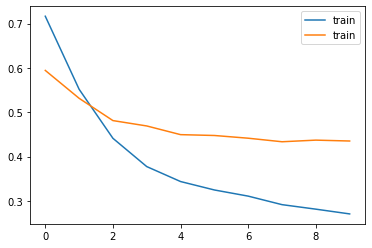

In [106]:
import matplotlib.pyplot as plt
plt.plot(base_model.history['loss'],label='train')
plt.plot(base_model.history['val_loss'],label='train')
plt.legend()
plt.show()

In [107]:
prob_train = model.predict(X_train)
prob_test = model.predict(X_test)

In [108]:
# Probablitiy of employee attrition
prob_test[:10]

array([[0.29554465],
       [0.00561476],
       [0.2406128 ],
       [0.00845259],
       [0.04488438],
       [0.14968932],
       [0.05457109],
       [0.00128943],
       [0.37870356],
       [0.01113677]], dtype=float32)

(array([152.,  50.,  26.,  18.,  13.,  10.,   4.,   4.,   8.,   9.]),
 array([6.3928962e-04, 9.6267685e-02, 1.9189608e-01, 2.8752446e-01,
        3.8315287e-01, 4.7878128e-01, 5.7440966e-01, 6.7003804e-01,
        7.6566648e-01, 8.6129487e-01, 9.5692325e-01], dtype=float32),
 <a list of 10 Patch objects>)

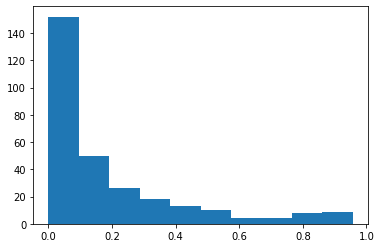

In [109]:
plt.hist(prob_test)

In [110]:
ypred_train = (prob_train>0.50).astype(np.int)
ypred_test = (prob_test>0.50).astype(np.int)

In [113]:
# For train data
print('Accuracy:  {} '.format(accuracy_score(y_train, ypred_train)))
print('Recall:    {} '.format(recall_score(y_train, ypred_train)))
print('Precision: {} '.format(precision_score(y_train, ypred_train)))
print('F1 Score:  {} '.format(f1_score(y_train, ypred_train)))

Accuracy:  0.8418367346938775 
Recall:    0.03664921465968586 
Precision: 0.7777777777777778 
F1 Score:  0.06999999999999999 


In [233]:
#For test data
confusion_matrix(y_test, ypred_test)

array([[236,  12],
       [ 27,  19]], dtype=int64)

In [232]:
# For test data
print('Accuracy:  {} '.format(accuracy_score(y_test, ypred_test)))
print('Recall:    {} '.format(recall_score(y_test, ypred_test)))
print('Precision: {} '.format(precision_score(y_test, ypred_test)))
print('F1 Score:  {} '.format(f1_score(y_test, ypred_test)))

Accuracy:  0.8673469387755102 
Recall:    0.41304347826086957 
Precision: 0.6129032258064516 
F1 Score:  0.49350649350649356 


In [198]:
Classifier_Scores.update({'Neural Network':[accuracy_score(y_test, ypred_test),recall_score(y_test, ypred_test),precision_score(y_test, ypred_test),f1_score(y_test, ypred_test)]})

### Comparing Classifier Performances

In [212]:
Classifier_Scores=pd.DataFrame(Classifier_Scores)
Classifier_Scores.rename({0:'Accuracy',1:'Recall',2:'Precision',3:'F1-Score'},inplace=True)

In [222]:
Classifier_Scores

,Logistic Regression,Random Forest,Neural Network
Accuracy,0.83,0.85,0.87
Recall,0.39,0.33,0.41
Precision,0.45,0.56,0.61
F1-Score,0.42,0.41,0.49


(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

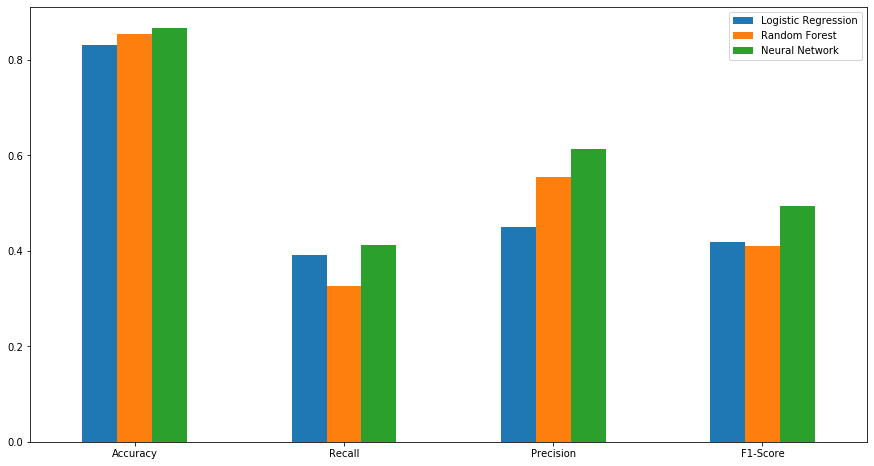

In [234]:
Classifier_Scores.plot.bar(figsize=(15,8))
plt.xticks(rotation=0)